In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from analyses_helper_functions import *

from sklearn.utils import shuffle 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import auc  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve  
from sklearn.linear_model import LogisticRegression  

import nltk
import gensim
import gensim.downloader as api
import gensim.models.keyedvectors as word2vec  

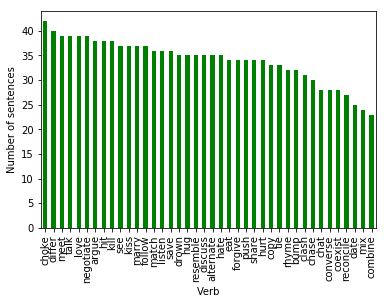

In [22]:
# Plotting distribution of sentences
df = pd.read_csv('verbcorp.csv', sep=',', encoding='latin-1') 
df['verb'].value_counts().plot(kind='bar',color="green"); 
plt.xlabel('Verb')
plt.ylabel('Number of sentences')
plt.show()


# Implementing LF model

Accuracy: 0.791208791209
F1 score: 0.822429906542
Precision: 0.80487804878
Recall: 0.84076433121


/Users/retina/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/retina/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)



Accuracy of prototype model: 73.3 %

Number of errors: 363

Most frequent misclassifications:

[('talk', 27), ('resemble', 24), ('marry', 22), ('discuss', 21), ('listen', 21), ('clash', 20), ('chat', 20), ('date', 17), ('converse', 17), ('choke', 17), ('meet', 17), ('negotiate', 14), ('argue', 13), ('kiss', 12), ('hit', 11), ('match', 11), ('alternate', 10), ('hurt', 10), ('follow', 10), ('see', 10), ('bump', 6), ('eat', 6), ('hate', 5), ('combine', 4), ('share', 4), ('drown', 4), ('kill', 3), ('mix', 2), ('save', 2), ('copy', 2), ('push', 1)]


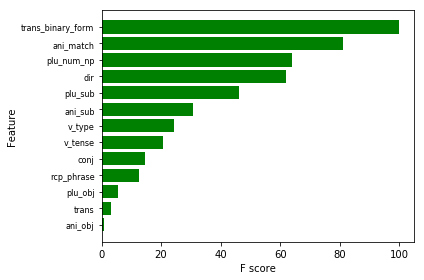

In [23]:
feature_names = list(df.columns) 

labels = df.category
verbs = df.verb
sentences = df.sentence

del df['verb']
del df['sentence']   
del df['category'] 
features=df.values

X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=0)
 
# LogReg Model
logreg = LogisticRegression()

# Fit model, predict data
logreg.fit(X_train,y_train) 
y_pred=logreg.predict(X_test)  

# Test statistic(s)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
 
# 10-fold cross validation  
results=cv(logreg,features,labels)

A=[np.mean(results['train_accuracy']),
   np.mean(results['test_accuracy']),
   np.mean(results['train_f1_score']),
   np.mean(results['test_f1_score']),
   np.mean(results['train_precision']),
   np.mean(results['test_precision']),
   np.mean(results['train_recall']),
   np.mean(results['test_recall'])]

# print(A)

# LOOCV
s,m = loo_features(sentences,verbs,features,labels)
 
# Plotting feature importance 
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max()) #normalize data
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5 
f = plt.figure()
ft = f.add_subplot(1, 1, 1)
ft.barh(pos, feature_importance[sorted_idx], align='center',color='green')
ft.set_yticks(pos)
ft.set_yticklabels(np.array(df.columns)[sorted_idx], fontsize=8) 
ft.set_xlabel('F score')
ft.set_ylabel('Feature')
#ft.axvline(x=60, color="r",alpha=0.6)

plt.tight_layout()   
plt.show()

# Implementing word2vec model

In [25]:
# Load word2vec vector 
wv = word2vec.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz",
    binary=True)
wv.init_sims(replace=True)

sents=tokenize_text(sentences) 
 
#Averaging word2vec embedding for each sentence
data_word2vec = word_avg_list(wv,sents,1)

# word2vec  
word_V = data_word2vec
X_W2V_train, X_W2V_test, y_W2V_train, y_W2V_test = train_test_split(word_V,
                                                    labels,
                                                    test_size=0.2)
logreg.fit(X_W2V_train, y_W2V_train)
 
y_W2V_pred = logreg.predict(X_W2V_test)

# 10-fold CV
results_w=cv(logreg,word_V,labels) 

B=[np.mean(results_w['train_accuracy']),
   np.mean(results_w['test_accuracy']),
   np.mean(results_w['train_f1_score']),
   np.mean(results_w['test_f1_score']),
   np.mean(results_w['train_precision']),
   np.mean(results_w['test_precision']),
   np.mean(results_w['train_recall']),
   np.mean(results_w['test_recall'])]

#print(B)
 
# Test statistic(s)
print("Accuracy:",metrics.accuracy_score(y_W2V_pred,y_W2V_test))
print("F1 score:",metrics.f1_score(y_W2V_pred,y_W2V_test))
print("Precision:",metrics.precision_score(y_W2V_pred,y_W2V_test))
print("Recall:",metrics.recall_score(y_W2V_pred,y_W2V_test))

# LOO cross val 
s_w,m_w=loo_features(sents,verbs,word_V, labels)

/Users/retina/anaconda/lib/python3.5/site-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/Users/retina/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/retina/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Accuracy: 0.692307692308
F1 score: 0.755813953488
Precision: 0.872483221477
Recall: 0.666666666667

Accuracy of prototype model: 67.6 %

Number of errors: 441

Most frequent misclassifications:

[('hit', 36), ('resemble', 23), ('converse', 21), ('eat', 21), ('discuss', 20), ('kiss', 20), ('hurt', 19), ('clash', 16), ('hate', 16), ('hug', 16), ('push', 14), ('date', 14), ('share', 14), ('forgive', 13), ('bump', 13), ('see', 13), ('drown', 12), ('copy', 11), ('chase', 10), ('kill', 9), ('meet', 9), ('love', 9), ('listen', 9), ('negotiate', 8), ('argue', 8), ('differ', 8), ('coexist', 7), ('follow', 7), ('choke', 6), ('rhyme', 6), ('alternate', 5), ('reconcile', 4), ('combine', 4), ('save', 4), ('match', 4), ('mix', 3), ('talk', 3), ('marry', 2), ('tie', 2), ('chat', 2)]


# Implementing GloVe model

In [32]:
glv = api.load("glove-wiki-gigaword-100")  

data_glove = word_avg_list(glv,sents,0)

X_G_train, X_G_test, y_G_train, y_G_test = train_test_split(data_glove,
                                                    labels,
                                                    test_size=0.2)
logreg.fit(X_G_train, y_G_train)
 
y_G_pred = logreg.predict(X_G_test) 
 
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_G_test, y_G_pred)))
print('F1 score: {:.2f}'.format(metrics.f1_score(y_G_test, y_G_pred)))
print('Precision: {:.2f}'.format(metrics.precision_score(y_G_test, y_G_pred)))
print('Recall: {:.2f}'.format(metrics.recall_score(y_G_test, y_G_pred)))
   
# 10-fold CV
results_g=cv(logreg,data_glove,labels) 

C=[np.mean(results_g['train_accuracy']),
   np.mean(results_g['test_accuracy']),
   np.mean(results_g['train_f1_score']),
   np.mean(results_g['test_f1_score']),
   np.mean(results_g['train_precision']),
   np.mean(results_g['test_precision']),
   np.mean(results_g['train_recall']),
   np.mean(results_g['test_recall'])]

print(C)

# LOO cross val 
s_v,m_v=loo_features(sents,verbs,data_glove, labels)

/Users/retina/anaconda/lib/python3.5/site-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Accuracy: 0.69
F1 score: 0.75
Precision: 0.65
Recall: 0.89


/Users/retina/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/retina/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)



Accuracy of prototype model: 64 %

Number of errors: 490

Most frequent misclassifications:

[('hit', 29), ('resemble', 24), ('converse', 22), ('eat', 22), ('clash', 19), ('hurt', 19), ('hate', 18), ('meet', 18), ('discuss', 17), ('kiss', 17), ('rhyme', 17), ('see', 17), ('forgive', 16), ('save', 16), ('differ', 13), ('match', 13), ('drown', 13), ('kill', 12), ('coexist', 12), ('copy', 12), ('argue', 11), ('reconcile', 11), ('hug', 11), ('love', 11), ('listen', 11), ('negotiate', 10), ('chase', 10), ('choke', 10), ('talk', 9), ('push', 7), ('combine', 7), ('date', 7), ('bump', 7), ('mix', 5), ('share', 5), ('chat', 5), ('alternate', 4), ('tie', 2), ('follow', 1)]


# Misc. exporting and graphing

In [ ]:
# Option to export error sentences to CSV (although the CSVs are already available in the repo)
#errors_lf=pd.DataFrame({'Sentence':s, 'New (wrong) category':m}) 
#errors_lf.to_csv (r'LF_errors.csv', index = False, header=True)
#errors_w2v=pd.DataFrame({'Sentence':s_w,'New (wrong) category':m_w}) 
#errors_w2v.to_csv (r'w2v_errors.csv', index = False, header=True)
# errors_g=pd.DataFrame({'Sentence':s_v,'New (wrong) category':m_v}) 
# errors_g.to_csv (r'w2g_errors.csv', index = False, header=True)

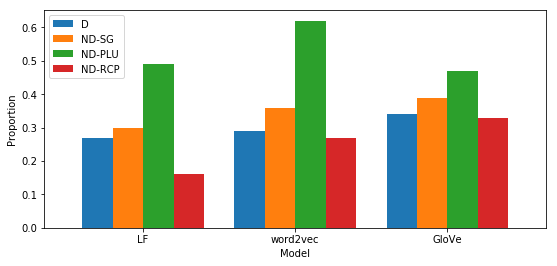

In [962]:
# Graphing context error proportions
# Values calculated manually from dividing the number of contexts misclassified
# by the total number of contexts in the dataset
raw_data = {'Model': ['LF','word2vec','GloVe'],
            'D': [0.27,0.29,0.34], 
            'ND-SG': [0.30,0.36,0.39],
            'ND-PLU': [0.49,0.62,0.47],
            'ND-RCP': [0.16,0.27,0.33]}

cx = pd.DataFrame(raw_data, columns = ['Model', 'D', 'ND-SG','ND-PLU','ND-RCP'])

cx.plot(kind='bar',x=cx['Model'].values,legend=True, width=0.8, figsize=(9,4))
plt.xlabel('Model')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

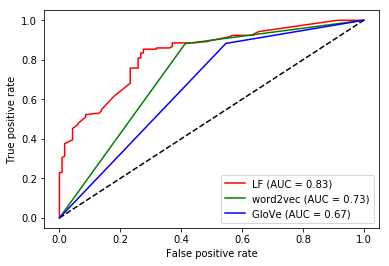

In [24]:
# AUROC graphing 
# LF
y_ROC = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_ROC)
auc = metrics.roc_auc_score(y_test, y_ROC) 

#word2vec
fpr_w2v, tpr_w2v, _ = metrics.roc_curve(y_W2V_test,y_W2V_pred)
auc_w2v = metrics.roc_auc_score(y_W2V_test,y_W2V_pred)   

#GloVe
fpr_g, tpr_g, _ = metrics.roc_curve(y_G_test,y_G_pred) 
auc_g = metrics.roc_auc_score(y_G_test,y_G_pred)  

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,color='r',label='LF (AUC = {:.2f})'.format(auc))
plt.plot(fpr_w2v,tpr_w2v,color='g',label='word2vec (AUC = {:.2f})'.format(auc_w2v))
plt.plot(fpr_g,tpr_g,color='blue',label='GloVe (AUC = {:.2f})'.format(auc_g))
#plt.plot(fpr_sq, tpr_sq,color='b', label='Sequential (AUC = {:.2f})'.format(auc_sq)) 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate') 
plt.legend(loc='best')
plt.show()
